 <div style="width: 100%; overflow: hidden; text-align:center;">
    <h1>INF-391 Reconocimiento de Patrones en Minería de Datos</h1>
    <h2>Tarea 1 - Beer Clustering</h2><br/>
    <div style="width: 300px; float: left;">
        <h3>Sebastián Orellana</h3>
        <h4>``sebastian.orellan.12@sansano.usm.cl``</h4>
        <h4>201273591-2</h4>
    </div>
    <div style="width: 300px; float: left;">
        <h3>Alonso Orellana</h3>
        <h4>``alonso.orellana@alumnos.usm.cl``</h4>
        <h4>201073551-6</h4>
    </div>
    <div style="width: 300px; float: left;">
        <h3>Matías Ramirez</h3>
        <h4>``matias.ramirez@alumnos.usm.cl``</h4>
        <h4>201173506-4</h4>
    </div>
</div>

### Introducción

En este documento se exponen la implementación, prueba (incluyendo visualizaciones) y evaluación de cinco algoritmos de clustering: k-means, minibatch k-means, HAC complete, HAC ward y DBScan. Además se estudia la calidad de determinadas etiquetas sobre cada clustering obtenido.

Para la elaboración de esta tarea se trabajará con el dataset _beeradvocate_, el cual consiste en una gran colección de
reseñas de cervezas del sitio BeerAdvocate. Dentro de cada una de estas reseñas se encuentra una
evaluación en diferentes aspectos de la cerveza, además de información de procedencia, tipo de cerveza,
entre otros.

El procedimiento completo hace uso de las siguiente librerías:

In [66]:
import pandas as pd #para el manejo de DataFrames
import numpy as np #para operaciones matemáticas

from sklearn.cluster import KMeans #importación del algoritmo de clustering k-means
from sklearn.cluster import MiniBatchKMeans #importación del algoritmo de clustering minibatch k-means
from sklearn.cluster import AgglomerativeClustering as HAC #importación del algoritmo de clustering HAC complete/ward
from sklearn.cluster import DBSCAN #importación del algoritmo de clustering DBScan

from sklearn.decomposition import PCA #para reducción de dimensionalidad por medio del algoritmo PCA
import matplotlib.pyplot as plt #para visualización de clustering obtenido

from sklearn.metrics import silhouette_score #para evaluación de clustering obtenido: índice silhouette
from sklearn.metrics.cluster import normalized_mutual_info_score #para evaluación de clustering obtenido: índice NMI
from sklearn.metrics.cluster import adjusted_rand_score #para evaluación de clustering obtenido: índice ARi
from sklearn.metrics.cluster import fowlkes_mallows_score #para evaluación de clustering obtenido: índice FMi

### a) Cargar dataset

In [48]:
#se carga en reviews con relleno de registros vacíos
reviews = pd.read_csv(open('beer_reviews.csv', encoding="utf8")).fillna(method='ffill')

### b) Descripción y tratamiento del dataset

Cuantitativamente se describe el dataset _beeradvocate_ como un conjunto de 1.586.614 registros con 13 atributos cada uno:

In [24]:
print("Dimensionalidad del dataset: ", reviews.shape[1])
print("Cantidad de registros: ", reviews.shape[0])

Dimensionalidad del dataset:  13
Cantidad de registros:  15866


La siguiente tabla describe los datos cualitativamente, además del tipo de atributo que corresponde cada dimensión:

<table class="tg">
  <tr>
    <th class="tg-yw4l">Nombre atributo</th>
    <th class="tg-yw4l">Tipo<br></th>
    <th class="tg-yw4l">Descripción<br></th>
  </tr>
  <tr>
    <td class="tg-yw4l">brewery_id</td>
    <td class="tg-yw4l">int64</td>
    <td class="tg-yw4l">ID de cervecería</td>
  </tr>
  <tr>
    <td class="tg-yw4l">brewery_name</td>
    <td class="tg-yw4l">object</td>
    <td class="tg-yw4l">Nombre de cervecería</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_time</td>
    <td class="tg-yw4l">int64</td>
    <td class="tg-yw4l">Fecha en que se realiza la evaluación</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_overall</td>
    <td class="tg-yw4l">float64</td>
    <td class="tg-yw4l">Puntaje general de la cerveza evaluada</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_aroma</td>
    <td class="tg-yw4l">float64</td>
    <td class="tg-yw4l">Puntaje en aroma de la cerveza evaluada</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_appearance</td>
    <td class="tg-yw4l">float64</td>
    <td class="tg-yw4l">Puntaje en apariencia de la cerveza evaluada</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_profilename</td>
    <td class="tg-yw4l">object </td>
    <td class="tg-yw4l">Nombre del evaluador</td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_style</td>
    <td class="tg-yw4l">object </td>
    <td class="tg-yw4l">Tipo de creveza</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_palate</td>
    <td class="tg-yw4l">float64</td>
    <td class="tg-yw4l">Puntaje sensación en paladar de la cerveza evaluada</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_taste</td>
    <td class="tg-yw4l">float64</td>
    <td class="tg-yw4l">Puntaje en gusto de la cerveza evaluada</td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_name</td>
    <td class="tg-yw4l">object </td>
    <td class="tg-yw4l">Nombre de la cerveza</td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_abv</td>
    <td class="tg-yw4l">float64</td>
    <td class="tg-yw4l">Grado alcohólico de la cerveza evaluada</td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_beerid</td>
    <td class="tg-yw4l">int64</td>
    <td class="tg-yw4l">ID de cerveza</td>
  </tr>
</table>


Para efectos prácticos dividimos estos trece atributos en tres subconjuntos: **atributos_etiquetas** (beer_style, beer_beerid), **atributos_puntajes** (review_overall, review_aroma, review_appearance, review_palate, review_taste, beer_abv) y **atributos_cualitativos** (brewery_id, brewery_name, review_time, review_profilename, beer_name). Este procedimiento se explica porque el interés de clusterizar los datos se centra en atributos numéricos que permitan arrojar conclusiones sobre la calidad de las cervezas evaluadas. Así, ignoramos los **atributos_cualitativos** y utilizamos como dataset el subconjunto de dimensionalidad seis representada por los **atributos_puntajes**. Utilizamos los **atributos_etiquetas** en la sección d), donde asumimos que estos correponden a etiquetas sobre el conjunto de datos, con el fin de evaluar cual de ellas se asemeja en mayor medida a las etiquetas _empíricas_ obtenidas por cada algoritmo de clustering utilizado.

Como tratamiento adicional de los datos originales, se realiza un muestreo que entrega un subconjunto de 0.01 del total de registros. Esto se justifica por dos razones afectadas por la alta magnitud de datos: la visualización en 2D conseguida para el dataset original tiende a compactar excesivamente los puntos representantes de cada registro (esto favorecido por _el mal de la dimensionalidad_ también presente en el dataset), impidiendo la visualización de clusters; además la alta complejidad espacial de algunos algoritmos de clustering (como HAC ward link: $O(N^2)$, debido al empleo de una matriz de proximidad) obligan a la reducción de cantidad de registros para no tropezar con errores de memoria. Cabe destacar que el muestreo utilizado es constante en toda la actividad. Sin embargo, volver a ejecutar el código adjuntado en la entrega implica un muestreo diferente y por ende, los clustering encontrados debiesen ser ligeramente distintos.

In [49]:
reviews=reviews.sample(frac=0.01)
etiquetas= reviews[['beer_style','beer_beerid']]
puntajes=reviews[['review_overall','review_aroma','review_appearance','review_palate','review_taste', 'beer_abv']]

Luego, se aplica el algoritmo _Principal Component Analysis (PCA)_ sobre el DataFrame generado, con la intención de reducir la dimensionalidad (6D) hasta a una representación graficable en un minifold 2D.

In [50]:
puntajes = PCA(n_components = 2).fit_transform(puntajes)

Por último, se decide no aplicar pre-procesamiento de datos (normalización de data y eliminación de outliers), ya que las escalas de asignación de puntajes parecen ser similares y una normalización sobre sus valores no implicaría un verdadero impacto sobre el clustering resultante. En cuanto a los outliers existentes, se decide conservarlos con fines pedagógicos, esperando conseguir contrastes entre algoritmos que difieran en su sensibilidad a outliers. 

### c) Implementación de algoritmos de clustering

A continuación se prueban los algoritmos sobre el dataset resultante. En general el principal criterio de elección de parámetros se basa en un escenario no supervisado de evaluación, por lo que se privilegian aquellos parámetros que maximizen el coeficiente de Silhouette, el cual entrega información sobre el grado de cohesión de un cluster y el grado de separación con respecto al cluster más cercano (en un rango de [-1,1]). Cabe destacar que aquellos parámetros que mantienen sus valores por defecto no son considerados en este documento al no producir resultados significativamente diferentes al realizar ajustes sobre ellos. 

* **K-means**

Luego de realizar múltiples ejecuciones del algortimo para distintos parámetros, se definieron estos como definitivos:

_init = "k-means++"_. Conocida es la importancia de escoger buenos centroides iniciales o el clustering con k-means podría ser deficiente. _k-means++_ provee una forma inteligente de selección por medio de semillas distribuidas simétricamente asemejando una grilla, ofreciendo una más pronta convergencia.

*n_clusters = 2*. Este valor para cantidad de cluster predefinidos (K) se seteo en función de la maximización del coeficiente de Silhouette (máximo encontrado: 0.494140827102). A pesar de que aumentar K es una forma fácil de reducir el error cuadrático estándar (SSE), un buen clustering con K pequeño puede obtener un menor SSE que un mal clustering con K alto. En este contexto no se probaron cantidades de clusters superiores a 150 ya que la complejidad del algoritmo es lineal con respecto a K implicando errores en la ejecución.

*n_init = 10*. Como es de esperarse para un clustering por medio de k-means, la convergencia debiese encontrarse en las primeras iteraciones. Adicionalmente se demostró empíricamente para este conjunto de datos que la cantidad de veces que se ejecuta el algoritmo no altera considerablemente el resultado, por lo cual este parámetro es diminuído a 10 para acelerar la ejecución total.

Coeficiente de Silhouette:  0.494140827102


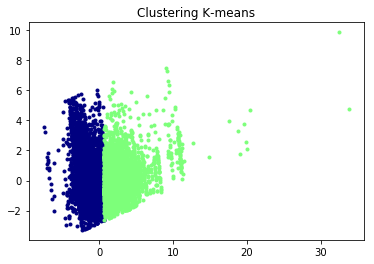

In [52]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 10)

k_means.fit(puntajes)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

print("Coeficiente de Silhouette: ", silhouette_score(puntajes, k_means_labels))

for k in np.unique(k_means_labels):
    plt.plot(puntajes[k_means_labels == k, 0], puntajes[k_means_labels == k, 1], '.', color = plt.cm.jet(np.float(k) / np.max(k_means_labels + 1)))

plt.title("Clustering K-means")
plt.show()

Si bien el resultado obtenido no es cualitativamente óptimo ya que no se aprecia una evidente separación entre ambos cluster, cuantitativamente el clustering arroja un resultado aceptable debido principalmente al alto grado de cohesión de los clusters representado en el coeficiente de Silhouette, a pesar de los once outliers que mantiene el cluster etiquetado con color verde.

* **Minibatch k-means**

Luego de realizar múltiples ejecuciones del algortimo para distintos parámetros, se definieron estos como definitivos:

_init = "k-means++"_. Ídem al caso anterior.

*n_clusters = 2*. Ídem al caso anterior.

*n_init = 10*. Ídem al caso anterior.

*batch_size = 50*. Considerando que mientras mayor sea el tamaño del batch mayor será el parecido con el algoritmo anterior, se reduce hasta 50 con la intención de mejorar el desempeño, sin embargo el coeficiente de Silhouette arroja resultados muy similares independiente del tamaño del batch utilizado (máximo encontrado: 0.494929787584).

Coeficiente de Silhouette:  0.494929787584


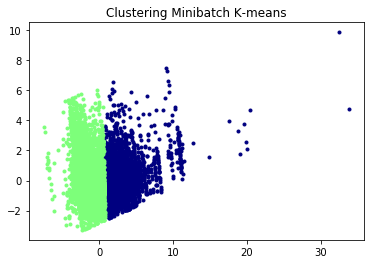

In [53]:
mini_batch = MiniBatchKMeans(init = 'k-means++', n_clusters = 2, n_init = 10, batch_size = 50)
mini_batch.fit(puntajes)

mini_batch_labels = mini_batch.labels_

print("Coeficiente de Silhouette: ", silhouette_score(puntajes, mini_batch_labels))

for k in np.unique(mini_batch_labels):
    plt.plot(puntajes[mini_batch_labels == k, 0], puntajes[mini_batch_labels == k, 1], '.', color = plt.cm.jet(np.float(k) / np.max(mini_batch_labels + 1)))

plt.title("Clustering Minibatch K-means")
plt.show()

Así, el clustering encontrado es muy similar al caso anterior. El comportamiento del dataset no sugiere una división clara entre clusters, por lo que el criterio de recálculo de centroides no impacta sobre el resultado final. Se observa experimentalmente que dado un conjunto de datos uniforme y cohesionado, los clusters arrojados tienden a mantener tal uniformidad (correspondido por sus densidades similares).

* **HAC Complete**

Luego de realizar múltiples ejecuciones del algortimo para distintos parámetros, se definieron estos como definitivos:

_linkage = 'complete'_. Se utiliza esta medida de distancia entre clusters para definir cualquier implementación de HAC Complete.

*n_clusters = 2*. El corte pertinente en el dendrograma generado exige dos clusters, viéndose reflejado en un alto coeficiente de Silhouette (máximo encontrado: 0.729400000246).

_affinity = 'euclidean'_. La selección de este parámetro ignoró como cirterio principal la maximización del coeficiente de Silhouette. Si bien se probó con otras métricas clásicas como _'cosine', 'l1' y 'l2'_, no se encontraron mejores resultados que el expuesto a continuación. Sin embargo, al utilizar la distancia _'manhattan'_ como métrica, se obtiene un muy alto coeficiente de Silhouette (mayor a 0.9), pero es descartado al interpretarse como un clustering extremadamente sensible a outliers, ya que agrupó en un cluster únicamente al dato más alejado del conjunto y todo el resto en el segundo cluster. 

Coeficiente de Silhouette:  0.729400000246


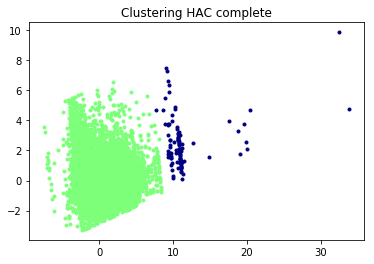

In [51]:
hac_complete = HAC(linkage = 'complete', n_clusters = 2, affinity = 'euclidean')
hac_complete.fit(puntajes)

hac_complete_labels = hac_complete.labels_

print("Coeficiente de Silhouette: ", silhouette_score(puntajes, hac_complete_labels))

for k in np.unique(hac_complete_labels):
    plt.plot(puntajes[hac_complete_labels == k, 0], puntajes[hac_complete_labels == k, 1], '.', color = plt.cm.jet(np.float(k) / np.max(hac_complete_labels + 1)))

plt.title("Clustering HAC complete")
plt.show()

Observando la figura resultante se decreta como un mejor clustering que los obtenidos con _k-means_ y _Minibatch k-means_. Primero por su evaluación cuantitativa en un marco no supervisado de implementación (superior coeficiente de Silhouette). Segundo porque consigue una visualización de clusters aceptable (lógicamente relacionada con el punto anterior) considerando el dataset en cuestión, permitiendo observar separabilidad entre clases. 

Cabe destacar además la comprobación empírica de sensibilidad de este algoritmo frente a outliers y ruido, conseguida al ejecutar reiteradas ocaciones con diversos parámetros. Por otro lado, se subraya el buen manejo de clusters de diversos tamaños y el no quebrantamiento del cluster más grande como en el caso anterior, puntos que suelen ser limitaciones importantes en el clustering jerárquico.

* **HAC ward**

Luego de realizar múltiples ejecuciones del algortimo para distintos parámetros, se definieron estos como definitivos:

_linkage = 'ward'_. Se utiliza esta medida de distancia entre clusters para definir cualquier implementación de HAC Ward.

*n_clusters = 2*. El corte pertinente en el dendrograma generado exige dos o tres clusters, el cual implica un aceptable coeficiente de Silhouette (máximo encontrado: 0.469450986839). Se escoge dos como el número de clusters para evidenciar aún más el comportamiento del algoritmo detallado a continuación.

_affinity = 'euclidean'_. Ward sólo permite trabajar con distancias euclideanas al mantener como principal objetivo la minimización del SSE.

Coeficiente de Silhouette:  0.469450986839


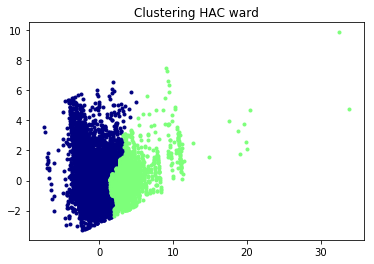

In [55]:
hac_ward = HAC(linkage = 'ward', n_clusters = 2, affinity = 'euclidean')
hac_ward.fit(puntajes)

hac_ward_labels = hac_ward.labels_

print("Coeficiente de Silhouette: ", silhouette_score(puntajes, hac_ward_labels))

for k in np.unique(hac_ward_labels):
    plt.plot(puntajes[hac_ward_labels == k, 0], puntajes[hac_ward_labels == k, 1], '.', color = plt.cm.jet(np.float(k) / np.max(hac_ward_labels + 1)))

plt.title("Clustering HAC ward")
plt.show()

La visualización muestra un desempeño bastante distinto al expuesto utilizando _Complete link_. Se evidencia en este caso la tendencia a quebrar clusters de gran tamaño en algoritmos de clusteing jerárquico. El coeficiente de Silhouette también demuestra deficiencias. Incluso, en desmedro de HAC ward, se observa un costo más alto en complejidad que el resto de algoritmos expuestos:

- Complejidad espacial: $O(N^2)$, al utilizar matriz de proximidad (N: número de registros)
- Complejidad temporal: $O(N^3)$, al realizar N pasos, cada uno de largo $N^2$ para buscar y actualizar en matriz de proximidad.

Así, HAC Ward representa el cuello de botella para la magintud del conjunto de datos utilizados para esta tarea.

* **DBScan**

Luego de realizar múltiples ejecuciones del algortimo para distintos parámetros, se definieron estos como definitivos:

_eps = 0.7_ y *min_samples = 9*. Entendiendo la sensibilidad de DBScan a la elección de ambos parámetros como su principal debilidad (agudizada en alta dimensionalidad) es que se fue particularmente meticuloso en su elección. Por medio de ensayo y error se detectó este equilibrio entre ambos parámetros que impedía que cada nodo se considerara vecino ya sea de todos o de ninguno con respecto al resto del conjunto de datos. De esta forma se encontró una maximización del coeficiente de Silhouette igual a 0.671115345339.

Coeficiente de Silhouette:  0.671115345339


C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


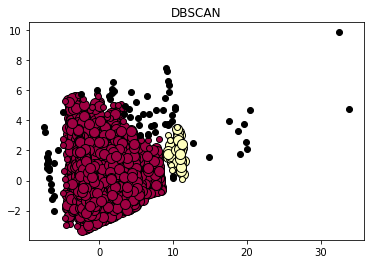

In [56]:
db = DBSCAN(eps = 0.7, min_samples = 9).fit(puntajes)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_

print("Coeficiente de Silhouette: ", silhouette_score(puntajes, db_labels))
unique_labels = set(db_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (db_labels == k)

    xy = puntajes[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = puntajes[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.show()

La visualización obtenida hace diferenciación al representar _Core Points_ (puntos más grandes con color respectivo al cluster que pertenecen), _Border Points_ (puntos más pequeños con color respectivo al cluster que pertenecen) y _Noise Points_ (puntos negros no representativos de ningún cluster). Así, el resultado sugiere dos clusters separados por una región de menor densidad, manejando de manera óptima clusters de diferentes formas y tamaños. Se realza empíricamente la resistencia al ruido y outliers como principal fortaleza de DBScan (además de no requerir valor previo de K). Cabe destacar que tanto cualitativamente como cuantitativamente, esta implementación arroja resultados bastante buenos, comparables con el mejor clustering realizado en este documento corespondiente al ofrecido por HAC Complete.

### d) Evaluación de etiquetas

A continuación, es de nuestro interés comparar la calidad de dos etiquetas de clase (*brewery_name* y *beer_style*) según los resultados obtenidos previamente. Para la elaboración de esta tarea se procede de la siguiente forma: en cada caso se supone que las etiquetas en evaluación corresponden a las verdaderas etiquetas sobre el conjunto de datos, implicando de esta manera un escenario supervisado de evaluación, para el cual existen índices conocidos (límitados a NMI y ARi para esta actividad) que son utilizados como métricas de la calidad de cada atributo como estiqueta considerando cada algoritmo de clustering implementado con anterioridad.

* *Caso 1: brewery_name*. Dado que cada valor de *brewery_name* hace correspondencia exactamente con un valor numérico de *beer_beerid* se opta por comodidad por la utilización de este último atributo para efectuar la evaluación de la etiqueta sin temor a perder información.

In [80]:
id_cerveza=etiquetas.as_matrix(['beer_beerid'])
id_cerveza=np.reshape(id_cerveza, (id_cerveza.shape[0],))
print("Informe Caso 1\n")

#Informe NMI
nmi_k = normalized_mutual_info_score(k_means_labels, id_cerveza)
nmi_mini = normalized_mutual_info_score(mini_batch_labels, id_cerveza)
nmi_hac_c = normalized_mutual_info_score(hac_complete_labels, id_cerveza)
nmi_hac_w = normalized_mutual_info_score(hac_ward_labels, id_cerveza)
nmi_db = normalized_mutual_info_score(db_labels, id_cerveza)
print("NMI k_means     : ", nmi_k)
print("NMI mini batch  : ", nmi_mini)
print("NMI HAC complete: ", nmi_hac_c)
print("NMI HAC ward    : ", nmi_hac_w)
print("NMI DBScan      : ", nmi_db)
print("NMI promedio    : ", (nmi_k+ nmi_mini + nmi_hac_c + nmi_hac_w + nmi_db)/5)
print("\n")

#Informe ARI
ari_k = adjusted_rand_score(k_means_labels, id_cerveza)
ari_mini = adjusted_rand_score(mini_batch_labels, id_cerveza)
ari_hac_c = adjusted_rand_score(hac_complete_labels, id_cerveza)
ari_hac_w = adjusted_rand_score(hac_ward_labels, id_cerveza)
ari_db = adjusted_rand_score(db_labels, id_cerveza)
print("ARI k_means     : ", ari_k)
print("ARI mini batch  : ", ari_mini)
print("ARI HAC complete: ", ari_hac_c)
print("ARI HAC ward    : ", ari_hac_w)
print("ARI DBScan      : ", ari_db)
print("ARI promedio    : ", (ari_k+ ari_mini + ari_hac_c + ari_hac_w + ari_db)/5)
print("\n")

Informe Caso 1

NMI k_means     :  0.269748524362
NMI mini batch  :  0.270287896078
NMI HAC complete:  0.0683986491144
NMI HAC ward    :  0.221892150666
NMI DBScan      :  0.0769275264462
NMI promedio    :  0.181450949333


ARI k_means     :  0.000526388576509
ARI mini batch  :  0.000523553492859
ARI HAC complete:  8.73396568911e-06
ARI HAC ward    :  0.000266499954183
ARI DBScan      :  9.13516999223e-06
ARI promedio    :  0.000266862231846




* *Caso 2: beer_style*. A diferencia del caso anterior, se compararán etiquetas numéricas contra _strings_, lo cual no representa un problema para los algoritmos de evaluación.

In [82]:
tipo_cerveza=etiquetas.as_matrix(['beer_style'])
tipo_cerveza=np.reshape(tipo_cerveza, (tipo_cerveza.shape[0],))
print("Informe Caso 2\n")

#Informe NMI
nmi_k = normalized_mutual_info_score(k_means_labels, tipo_cerveza)
nmi_mini = normalized_mutual_info_score(mini_batch_labels, tipo_cerveza)
nmi_hac_c = normalized_mutual_info_score(hac_complete_labels, tipo_cerveza)
nmi_hac_w = normalized_mutual_info_score(hac_ward_labels, tipo_cerveza)
nmi_db = normalized_mutual_info_score(db_labels, tipo_cerveza)
print("NMI k_means     : ", nmi_k)
print("NMI mini batch  : ", nmi_mini)
print("NMI HAC complete: ", nmi_hac_c)
print("NMI HAC ward    : ", nmi_hac_w)
print("NMI DBScan      : ", nmi_db)
print("NMI promedio    : ", (nmi_k+ nmi_mini + nmi_hac_c + nmi_hac_w + nmi_db)/5)
print("\n")

#Informe ARI
ari_k = adjusted_rand_score(k_means_labels, tipo_cerveza)
ari_mini = adjusted_rand_score(mini_batch_labels, tipo_cerveza)
ari_hac_c = adjusted_rand_score(hac_complete_labels, tipo_cerveza)
ari_hac_w = adjusted_rand_score(hac_ward_labels, tipo_cerveza)
ari_db = adjusted_rand_score(db_labels, tipo_cerveza)
print("ARI k_means     : ", ari_k)
print("ARI mini batch  : ", ari_mini)
print("ARI HAC complete: ", ari_hac_c)
print("ARI HAC ward    : ", ari_hac_w)
print("ARI DBScan      : ", ari_db)
print("ARI promedio    : ", (ari_k+ ari_mini + ari_hac_c + ari_hac_w + ari_db)/5)
print("\n")

Informe Caso 2

NMI k_means     :  0.227026562779
NMI mini batch  :  0.228082654083
NMI HAC complete:  0.0291435872804
NMI HAC ward    :  0.166010569709
NMI DBScan      :  0.0391360725695
NMI promedio    :  0.137879889284


ARI k_means     :  0.0258377895067
ARI mini batch  :  0.0258866392422
ARI HAC complete:  -0.000208321762288
ARI HAC ward    :  0.00965680137166
ARI DBScan      :  -0.000133989582093
ARI promedio    :  0.0122077837552




Ahora estamos en condiciones de evaluar ambas etiquetas. A simple vista los promedios sobre cada algoritmo de clustering arrojados por los índices utilizados manifiestan deficiencia en ambos atributos como etiquetas de clustering. Si bien no es posible acusar con certeza la baja calidad de representación del nombre y estilo de cerveza con respecto al dataset, ya que podría ser consecuencia de un deficiente proceso de clustering, los resultados arrojados por el índice ARi (Adjusted Rand index) son concluyentes. Esto debido a que en un rango de [-1,1] ARi ofrece información comparativa con una clasificación aleatoria (siendo 0 el valor equivalente a una asignación random), para lo cual se obtienen valor muy cercanos a 0, implicando casi aleatoriedad en la asignación realizada en el caso 1, y apenas superada por el caso 2. En cuanto a los resultados arrojados por NMI (Normalized Mutual Information), interpretado como el índice de cuánto el conocimiento de los atributos seleccionados como etiquetas reducen la incertidumbre de la asignación realizada por el clustering en un rango de [0,1], se desprende una muy leve ventaja para la representatividad del nombre de cereveza (siendo ambos valores encontrados bastante bajos). Así, se concluye con escasa convicción que el tipo de cerveza describe mejor a los cluster como etiquetas de clase por sobre el nombre de la cerveza, lo cual resulta intuitivo al entender el tipo de cerveza como una propiedad más preponderante en la definición de tal producto. Comprobamos de esta forma la existencia de diferentes valores de calidad como marcas de clase asociados a determinados atributos cualitativos del conjunto de datos en función de resultados obtenidas asumiendo un escenario supervisado de evaluación.

Finalmente, si nuestra intención es definir algún criterio para determinar el mejor tipo de cerveza, se debe suponer nuevamente un proceso de clustering supervisado, donde las etiquetas correponden al tipo de cerveza (*beer_style*), asumiendo también un buen clustering sobre dicha característica. Adicionalmente, se considera que cada *atributo_puntaje* utilizado en esta tarea corresponde a una escala numérica donde una mayor puntuación corresponde a una mejor calidad del atributo (asunción no necesariamente cierta para el atributo grado alcohólico de la cerveza *beer_abv*). Luego, podemos determinar como un mejor tipo de cerveza a aquellos clusters que se ubican en las regiones más positivas del plano, es decir en el extremo superior derecho, perdiendo calidad relativa a medida que se acercan al cuadrante opuesto. 

### Conclusiones

El documento en su conjunto se considera una actividad bastante pedagógica. Se logró implementar de manera exitosa cinco algoritmos de clustering con sus respectivas visualizaciones, además de la ejecución de índices de evaluación tanto para escenarios supervisados como no supervisados. Si bien los resultados de clustering fueron muy poco precisos, implicando un proceso dificultoso, esto favoreció el aprendizaje en función de análisis explicativos de defectusidad realizados para cada algoritmo de clustering, evidenciando sus respectivas debilidades y fortalezas al enfrentarse a un conjunto de datos difícil de clasificar.  

Por último, con el fin de prevenir futuros procesos de clustering deficientes, se hace incapié en la dependencia frente a dificultades que el propio dataset presenta. Así, se proponen los siguientes procedimientos preventivos:

- La elección correcta de algoritmos de reducción de dimensionalidad que aseguren un óptimo manejo que conserve las características estructurales del conjunto de datos originales. En esta tarea se evaluaron algoritmos como Data Embedding, los cuales fueron descartados por una mayor complejidad con respecto a PCA.

- Pre-procesamiento de datos guiados por normalización de datos y eliminación de outliers. Como se comentó con anterioridad, este documento considero outliers con el fin de resaltar características de los algoritmos utilizados, pero en términos prácticos esta no debiese ser una manera óptima de proceder.

- Opciones menos valiosas (por desperdiciar excesiva información del dataset original) para obtener clusters más evidentes son considerar únicamente ciertos valores para determinado atributo, por ejemplo, haber considerado exclusivamente aquellos registros que presenten un id de cervecería menor a 1500 (notar aleatoridad del criterio); o bien reducir aún más el conjunto de datos en el proceso de muestreo. A continuación, se muestra una visualización del resultado arrojado por k-means al clusterizar con una fracción igual a 0.01 del conjunto de datos ya muestreados. Se aprecia una pequeña mejoría en el coeficiente de Silhouette, con una separación entre clusters más clara. Aunque como se comentó anteriormente, no corresponde a una herramienta muy beneficiosa.

Coeficiente de Silhouette:  0.533896480909


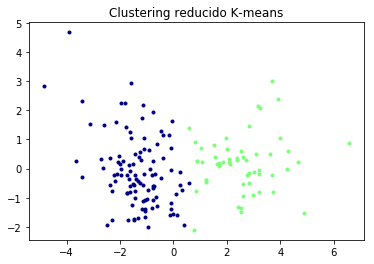

In [84]:
reviews_aux=reviews.sample(frac=0.01)
etiquetas_aux= reviews_aux[['beer_style','beer_beerid']]
puntajes_aux=reviews_aux[['review_overall','review_aroma','review_appearance','review_palate','review_taste', 'beer_abv']]
puntajes_aux = PCA(n_components = 2).fit_transform(puntajes_aux)

k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 10)

k_means.fit(puntajes_aux)
k_means_labels_aux = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

print("Coeficiente de Silhouette: ", silhouette_score(puntajes_aux, k_means_labels_aux))

for k in np.unique(k_means_labels_aux):
    plt.plot(puntajes_aux[k_means_labels_aux == k, 0], puntajes_aux[k_means_labels_aux == k, 1], '.', color = plt.cm.jet(np.float(k) / np.max(k_means_labels_aux + 1)))

plt.title("Clustering reducido K-means")
plt.show()